# Desafio Prático da e-Goi 

     Este notebook faz parte do desafio prático relativo à 2a fase de recrutamento da vaga Machine Learning Engineer da e-Goi do canditado Leonardo Mattes, sendo composto pelos seguintes itens:
     
     1. Descrição do problema 
     2. Análise do dataset e Feature Engineering 
     3. Criação e avaliação de modelos de previsão
     4. Testes de serialização do modelo e do codificador "one hot" 




# 1. Descriçao 
    

  O dataset utilizado é composto por 20 atributos (numéricos e categóricos). A label (1 ou 2) encontra-se na
última coluna e  foi disponibilizado no seguinte  URL:
         https://drive.google.com/open?id=1TLTuZ-Zc0Mcl16aYLdHqVKHneXmCdR5t
         
  O objetivo é a criação de um modelo de previsão a ser disponibilizado em uma REST API.
  
 
 **Obs: O dataset disponibilizado possuía duas colunas com label 'C5' que continham valores distintos.Para facilitar a interpretação, os nomes das colunas foram substituídos tentando manter a lógica de nomeclatura inicial. O uso do novo cabeçalho de colunas é fundamental para a realização dos testes.
 
 

# 2. Análise do dataset e Feature Engineering

In [18]:
colunas = ['C1','N1','C2','C3','N2','C4','C5','N3','C6','C7','N4','C8','N5','C9','C10','N6','C11','N7','C12','C13','LABEL']


In [19]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
import csv

def leDataSet():
    df = pd.read_csv('DatasetML.csv')
    df.columns = colunas
    # no dataset original tinhas dois c5
    return df

df=  leDataSet()  

df.head()    


,C1,N1,C2,C3,N2,C4,C5,N3,C6,C7,...,C8,N5,C9,C10,N6,C11,N7,C12,C13,LABEL
0,Z11,6,Z34,Z43,1169,Z65,Z75,4,Z93,Z101,...,Z121,67,Z143,Z152,2,Z173,1,Z192,Z201,1
1,Z12,48,Z32,Z43,5951,Z61,Z73,2,Z92,Z101,...,Z121,22,Z143,Z152,1,Z173,1,Z191,Z201,2
2,Z14,12,Z34,Z46,2096,Z61,Z74,2,Z93,Z101,...,Z121,49,Z143,Z152,1,Z172,2,Z191,Z201,1
3,Z11,42,Z32,Z42,7882,Z61,Z74,2,Z93,Z103,...,Z122,45,Z143,Z153,1,Z173,2,Z191,Z201,1
4,Z11,24,Z33,Z40,4870,Z61,Z73,3,Z93,Z101,...,Z124,53,Z143,Z153,2,Z173,2,Z191,Z201,2


In [20]:
# first lets see the numerical features 
df.describe()


,N1,N2,N3,N4,N5,N6,N7,LABEL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


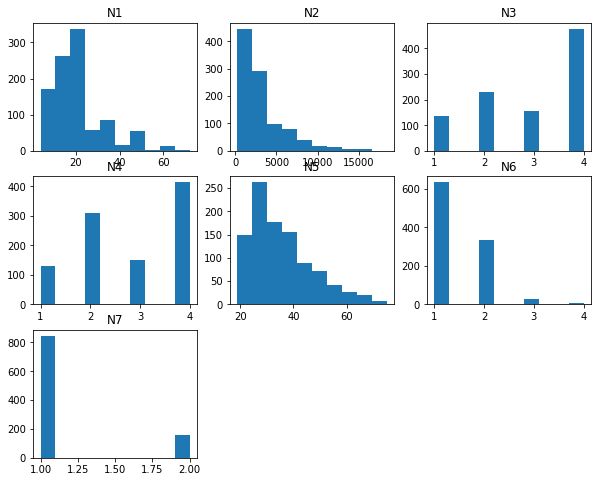

In [21]:
import matplotlib.pyplot as plt

#fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,8))

for i in range(1,8):
    campo = 'N' + str(i)
    std = np.std(df[campo])
    bins = int(std ) + 1
    y = df[campo]
    plt.subplot(3, 3, i)
    plt.title(campo  )
    plt.hist(y) 


## Para avaliar a complexidade do modelo se usarmos codificação "one hot, vamos dar uma olhada no número de categorias de cada coluna: 


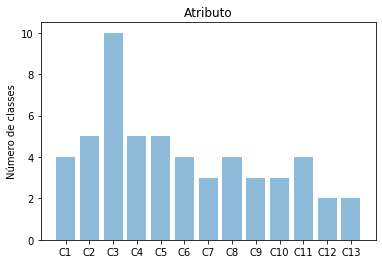

Número de dimenções para transformação one hot: 54


In [22]:
#
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def pegaNumeroClassesColuna(coluna):
    labelencode  = le.fit_transform(df[coluna]) 
    labels=   np.unique(labelencode)
    return len(labels)
nomes=[]
valores=[]
total = 0
for i in range(1,14):
    colname = 'C' + str(i)
    valor =pegaNumeroClassesColuna(colname)
    nomes.append(colname)
    valores.append(valor)
    total = total+ valor


plt.bar(nomes, valores, align='center', alpha=0.5)
plt.ylabel('Número de classes')
plt.title('Atributo')
plt.show()

print('Número de dimenções para transformação one hot: ' + str(total) )

### O atributo com maior númeor de classe é o C3 com 10, a soma de todas as classes chega a 50.

### Com a trasformação 'one hot' o problema que possui 20 atributos de complexidade passa a ter 61.

### Vamos ver a distribuição de cada classe:


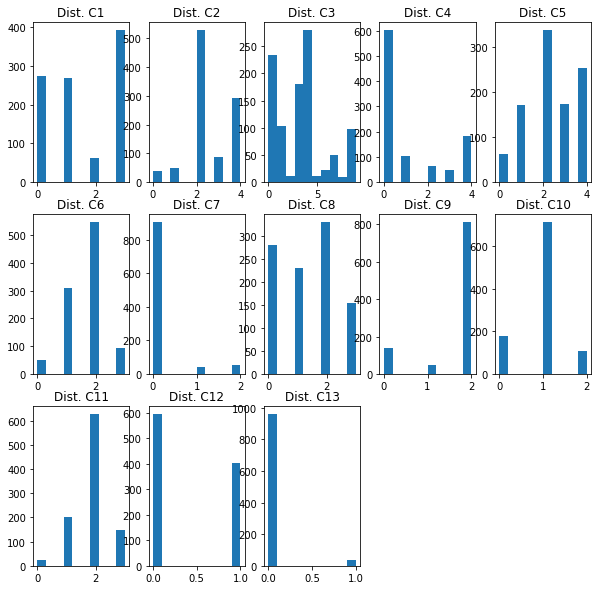

In [23]:

def pegaClassesColuna(coluna):
    labelencode  = le.fit_transform(df[coluna]) 
    return labelencode


#fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,10))
for i in range(1,14):
    campo = 'C' + str(i)
    y = pegaClassesColuna(campo)
    plt.subplot(3, 5, i)
    plt.title("Dist. " + campo  )
    plt.hist(y) 


###  Procedendo com a codificação 'one hot' recomendada para problemas de classificação com atributos  categóricos: 

In [24]:

# dicionario dos One Hot enconders utilizados
OneHorEncoders = {}


from sklearn.preprocessing import OneHotEncoder
def get_encoder_inst(feature_col, name):
    """
    returns: an instance of sklearn OneHotEncoder fit against a (training) column feature;
    such instance is saved and can then be loaded to transform unseen data
    """
    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec) 
    OneHorEncoders[name] = enc;
    #with open('Codificador'+ name, 'wb') as output_file:
     #       pickle.dump(enc, output_file)
    return enc 

def get_one_hot_enc(feature_col, enc, nome):
    """
    maps an unseen column feature using one-hot-encoding previously fit against training data 
    returns: a pd.DataFrame of newly one-hot-encoded feature
    """
    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    encoded_df = pd.DataFrame(encoded_vec)
    encoded_df.columns = [nome + str(col) for col in encoded_df.columns]
    return encoded_df






In [49]:
from sklearn.model_selection import train_test_split

df=  leDataSet() 
print(df.shape)

def transformaOneHotC(colName, df):
    enc= get_encoder_inst(df[colName], colName )
    one_cla = get_one_hot_enc(df[colName], enc, colName + '_' )
    df = pd.concat([df,one_cla],axis=1)
    df.drop([colName],axis=1, inplace=True)
    return df

def transformaOneHot(df):
    OneHorEncoders = {}
    for i in range(1,14):
        campo = 'C' + str(i)
        df = transformaOneHotC(campo, df)
    
    return df


df = transformaOneHot(df)

print(df.shape)    
df.head(3)


true_y = df['LABEL']
df.drop(['LABEL'],axis=1, inplace=True)
Xmatrix = df.as_matrix()

print('Data set completo:' )
print(true_y.shape)
print(Xmatrix.shape)

x_train, x_test, y_train, y_test = train_test_split(Xmatrix, true_y, test_size = 0.3, shuffle=True, random_state = 17)

print('Dataset de treino: ' )
print(y_train.shape)
print(x_train.shape)

print('Dataset para teste : ' )
print(y_test.shape)
print(x_test.shape)




(1000, 21)
(1000, 62)
Data set completo:
(1000,)
(1000, 61)
Dataset de treino: 
(700,)
(700, 61)
Dataset para teste : 
(300,)
(300, 61)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# 3. Criação e avaliação de modelos de previsão

Para a realização do modelo fiz testes com 3 algoritmos, que vem apresentando bons resultados para a maioria dos problemas:

   1.  GradientBoostingClassifier - Considerado um dos melhores algoritmos de classificação.
   
   2.  RandomForestClassifier -  Normamente não traz o mesmo resultado que o GradientBoostingClassifier mas costuma apresentar um menor viés.
   
   3. Suporte vector Machine - Outro algoritimo que vem apresentando bons resultados. 
   


In [26]:
# funcap para calcula f1-dcore
from sklearn.metrics import f1_score

def getAcuracy(classificador, x, y_true ):
    y_pret_treino = classificador.predict(x) 
    f1_s = f1_score(y_true, y_pret_treino, average='macro')  
    return f1_s



 
## GradientBoostingClassifier Model  


In [58]:

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

def boostingGridResolve(X_train, y_train, X_test, y_test ):
    from sklearn.model_selection import GridSearchCV
       
    parameters = {
        "learning_rate": [0.02, 0.05],
            "max_depth":[3, 5, 7],
        "subsample":[0.4 , 0.6, 0.8],
        "n_estimators":[  40,  50, 55, 60]
    }
    
    clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=4, n_jobs=-1)
    clf.fit(X_train, y_train)
    print(clf.score(X_train, y_train))
    print(clf.best_params_)
    print("Erro de treino")
    
    
    print("     F1-Score treino ",  getAcuracy( clf, X_train, y_train))
    print("     F1-Score teste ",  getAcuracy( clf, X_test, y_test))
    return clf
        

boostingClassifier = boostingGridResolve(x_train, y_train, x_test, y_test)


0.9542857142857143
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 70, 'subsample': 0.6}
Erro de treino
     F1-Score treino  0.9429526099180963
     F1-Score teste  0.667869620853762


 
## RandomForestClassifier Model  


In [31]:

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

def randonForestResolve(X_train, y_train, X_test, y_test ):
    from sklearn.model_selection import GridSearchCV
    
    
    # Set the parameters by cross-validation
    parameters = {'n_estimators': [50, 100, 200], 
                  'max_depth': [ 1, 2, 3, 8, 10, 20],
                  'min_samples_split': [0.1, 0.4, 0.7],
                  'min_samples_leaf': [1, 2, 4]
                 }

    # clf = ensemble.RandomForestRegressor(n_estimators=500, n_jobs=1, verbose=1)
    clf = GridSearchCV(ensemble.RandomForestClassifier(), parameters, cv=5,  n_jobs=-1, verbose=1)
    
    
    clf.fit(X_train, y_train)
    print(clf.score(X_train, y_train))
    print(clf.best_params_)
    
    y_pret_treino = clf.predict(X_train)
    
    print("     F1-Score treino ",  getAcuracy( clf, X_train, y_train))
    print("     F1-Score teste ",  getAcuracy( clf, X_test, y_test))
    
    
    return clf


randonClassifier = randonForestResolve(x_train, y_train, x_test, y_test)




Fitting 5 folds for each of 162 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   14.5s


0.7657142857142857
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 0.1, 'n_estimators': 50}
     F1-Score treino  0.6237299246148804
     F1-Score teste  0.5487604183256358


[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:   37.6s finished


## Support Vector Machines  (SVM) Classifier Model  

In [61]:

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import MaxAbsScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


def SVMResolve(X_train_o, y_train, X_test_o, y_test ):
     
    transformer = MaxAbsScaler().fit(X_train_o)
    X_train = transformer.transform(X_train_o)
    X_test = transformer.transform(X_test_o)
    
    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf'],
                         'gamma': [1e-3, 1e-4],
                         'C': [1, 10, 100, 150]},
                    ]
    
        
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
    clf.fit(X_train, y_train)
    print(clf.score(X_train, y_train))
    print(clf.best_params_)
    
    print("     F1-Score treino ",  getAcuracy( clf, X_train, y_train))
    print("     F1-Score teste ",  getAcuracy( clf, X_test, y_test))
    
    return clf


SVMclassifier = SVMResolve(x_train, y_train, x_test, y_test)


0.8142857142857143
{'C': 150, 'gamma': 0.001, 'kernel': 'rbf'}
     F1-Score treino  0.7612175282078194
     F1-Score teste  0.655266757865937


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
from sklearn.metrics import f1_score

def getAcuracy(classificador, x, y_true ):
    y_pret_treino = classificador.predict(x) 
    f1_s = f1_score(y_true, y_pret_treino, average='macro')  
    return f1_s
print("Resultados GradientBoostingClassifier ")
print("     F1-Score treino ",  getAcuracy( boostingClassifier, x_train, y_train))
print("     F1-Score treino ",  getAcuracy( boostingClassifier, x_test, y_test))
print("Resultados RandomForestClassifier ")
print("     F1-Score treino ",  getAcuracy( randonClassifier, x_train, y_train))
print("     F1-Score treino ",  getAcuracy( randonClassifier, x_test, y_test))
print("Resultados svm classifier ")
transformer = MaxAbsScaler().fit(x_train)
X_trainSVM = transformer.transform(x_train)
X_testSVM = transformer.transform(x_test)
    
print("     F1-Score treino ",  getAcuracy( SVMclassifier, X_trainSVM, y_train))
print("     F1-Score treino ",  getAcuracy( SVMclassifier, X_testSVM, y_test))




Resultados GradientBoostingClassifier 
     F1-Score treino  0.9429526099180963
     F1-Score treino  0.667869620853762
Resultados RandomForestClassifier 
     F1-Score treino  0.6237299246148804
     F1-Score treino  0.5487604183256358
Resultados svm classifier 
     F1-Score treino  0.7612175282078194
     F1-Score treino  0.655266757865937


## Análise

Os algoritmos GradientBoostingClassifier e SVM trouxeram resultados próximos, com leve vantagem para GradientBoostingClassifier.

Um possível ponto de vantagem para SVM seria em relação ao domínio dos atributos numéricos.  O SVM costuma ser mais efetivo caso o uso de valores fora dos intervalos contidos no dataset de treino. Contudo, como não tenho informação a respeito do problema real e não sei se tal situação se aplica ao problema proposto, logo, resolvi optar pelo modelo   __GradientBoostingClassifier__..


Vamos olhar com mais detalhes os resultados do modelo do GradientBoostingClassifier:




     Resultados de teste (final) GradientBoostingClassifier  
              precision    recall  f1-score   support

    Classe 1       0.78      0.88      0.83       208
    Classe 2       0.62      0.43      0.51        92

    accuracy                           0.74       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



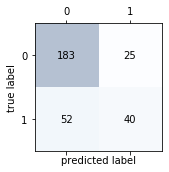

     Resultados de teste (final) SVM  
              precision    recall  f1-score   support

    Classe 1       0.78      0.83      0.80       208
    Classe 2       0.55      0.47      0.51        92

    accuracy                           0.72       300
   macro avg       0.67      0.65      0.66       300
weighted avg       0.71      0.72      0.71       300



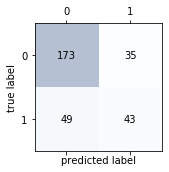

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def imprimeReport(classificador, x, y_True):
    target_names = ['Classe 1', 'Classe 2']
    y_predicted = classificador.predict(x) 
    print(classification_report(y_True, y_predicted, target_names=target_names))
    
    confmat = confusion_matrix(y_true=y_True, y_pred=y_predicted)
    
    
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
            

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()
              

print("     Resultados de teste (final) GradientBoostingClassifier  ")
imprimeReport( boostingClassifier, x_test, y_test)


print("     Resultados de teste (final) SVM  ")
imprimeReport( SVMclassifier, X_testSVM, y_test)




## Examinando a matriz de confusão, fica evidente que o modelo não é uniforme, apresentando desempenho inferior na classificação da categoria "2".



# 4 Testes de serialização do modelo e do codificador  "one hot"  

  Como parte do desafio é a realização de um REST API para a utilização do modelo de construído, precisamos serializar o codificador "one hot" e o classificador para sua utilização como serviço.
  
  A seguir, o código de serialização e seus testes: 
  

     Resultados de teste com modelo salvo 
              precision    recall  f1-score   support

    Classe 1       0.78      0.88      0.83       208
    Classe 2       0.62      0.43      0.51        92

    accuracy                           0.74       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300



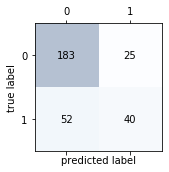

In [64]:
import pickle
import csv
# testando pickle  para serializar o modleo 
outfile = open('ClassificadorEgoi','wb')
pickle.dump(boostingClassifier,outfile)
outfile.close()


infile = open('ClassificadorEgoi','rb')
modelo = pickle.load(infile)
infile.close()

print("     Resultados de teste com modelo salvo ")
imprimeReport( modelo, x_test, y_test)
              




In [65]:

# dicionario dos enconders utilizados

# salva a lista de encoders
with open('OneHotCodificadores', 'wb') as output_file:
        pickle.dump(OneHorEncoders, output_file)
        
file = open('OneHotCodificadores','rb')
OneHotEncodersCarregado= pickle.load(file)
        


## Testar o codificador  "One Hot " serializado


In [66]:


from sklearn.preprocessing import OneHotEncoder
def getoneHotColum(nome, valor ): 
    enc = OneHotEncodersCarregado[nome]
    col_enc =  enc.transform([[valor]])
    return col_enc.toarray()


def getValuesDic(dic ):
    
    vetc = np.zeros(0)
    for c in colunas:
        if c.find("N") == 0:
            valor = int(dic[c])
            vetc = np.concatenate((vetc, np.array([valor])), axis=0)
    return vetc


def getoneHotVector(dic , vetc):
    for c in colunas:
        if c.find("C") == 0: 
            valor = dic[c]
            array = getoneHotColum (c, valor )
            vetc = np.concatenate((vetc, array.flatten()), axis=0)
            #for x in array.flatten():
             #   vetc = np.concatenate((vetc, np.array([x])), axis=0)
    return vetc


def encodeDic(dic ):
    vetc = getValuesDic(dic)
    vetc = getoneHotVector(dic, vetc)
    return  vetc
    
    

dfteste=  leDataSet()  
dfteste2=  leDataSet()  
dfteste2 = transformaOneHot(dfteste2)

true_y = dfteste2['LABEL']
dfteste2.drop(['LABEL'],axis=1, inplace=True)

### vamos comparar os encoders o primeiro vindo do pandas (utilizado no modelo)
# o segundo de um dicionario a ser utilizado no servico 


for i in  np.random.randint(1000, size=50):
    dic= dfteste.iloc[i].to_dict() 
    vetc= encodeDic(dic)
    print ('Vereficando em ', i , ' Matriz  =', np.array_equal(vetc,dfteste2.iloc[i][0:61])  )
    

dic= dfteste.iloc[i].to_dict() 
vetc= encodeDic(dic)
vetc.shape

  

Vereficando em  592  Matriz  = True
Vereficando em  40  Matriz  = True
Vereficando em  406  Matriz  = True
Vereficando em  323  Matriz  = True
Vereficando em  343  Matriz  = True
Vereficando em  919  Matriz  = True
Vereficando em  635  Matriz  = True
Vereficando em  966  Matriz  = True
Vereficando em  878  Matriz  = True
Vereficando em  622  Matriz  = True
Vereficando em  628  Matriz  = True
Vereficando em  489  Matriz  = True
Vereficando em  511  Matriz  = True
Vereficando em  912  Matriz  = True
Vereficando em  634  Matriz  = True
Vereficando em  113  Matriz  = True
Vereficando em  567  Matriz  = True
Vereficando em  913  Matriz  = True
Vereficando em  191  Matriz  = True
Vereficando em  346  Matriz  = True
Vereficando em  818  Matriz  = True
Vereficando em  855  Matriz  = True
Vereficando em  391  Matriz  = True
Vereficando em  173  Matriz  = True
Vereficando em  724  Matriz  = True
Vereficando em  602  Matriz  = True
Vereficando em  947  Matriz  = True
Vereficando em  55  Matriz  =

(61,)

2